<a href="https://colab.research.google.com/github/DrTihami/Yulu-Project/blob/main/Yulu_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, binom, tiecorrect, t, ttest_1samp, ttest_rel, ttest_ind, chi2, chisquare, chi2_contingency, f, kruskal, f_oneway
from scipy.stats import kstest, shapiro, levene
from scipy.stats import pearsonr, spearmanr
from scipy.stats import poisson, expon
import math
from math import factorial as f
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.gofplots import qqplot, qqplot_2samples

In [ ]:
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")

In [ ]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [ ]:
df["workingday"].value_counts()

1    7412
0    3474
Name: workingday, dtype: int64

In [ ]:
df["workingday"].nunique()

2

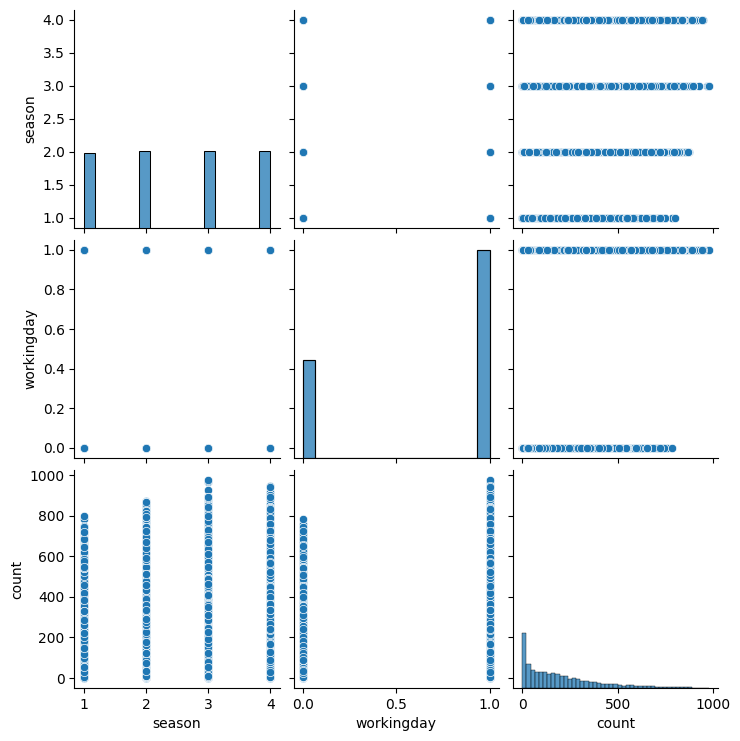

In [ ]:
sns.pairplot(data =df, vars =["season", "workingday", "count"])
plt.show()

In [ ]:
df.corr()

<ipython-input-11-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
season,1.000000,0.029368,-0.008126,0.008879,0.258689,0.264744,0.190610,-0.147121,0.096758,0.164011,0.163439
holiday,0.029368,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393
workingday,-0.008126,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594
weather,0.008879,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,0.007261,-0.135918,-0.109340,-0.128655
temp,0.258689,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454
atemp,0.264744,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784
humidity,0.190610,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371
windspeed,-0.147121,0.008409,0.013373,0.007261,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948


In [ ]:
df.groupby('season')['count'].nunique()

season
1    446
2    665
3    662
4    619
Name: count, dtype: int64

In [ ]:
df.groupby('holiday')['count'].nunique()

holiday
0    822
1    216
Name: count, dtype: int64

In [ ]:
df.groupby('workingday')['count'].nunique()

workingday
0    629
1    802
Name: count, dtype: int64

In [ ]:
df.groupby('weather')['count'].nunique()

weather
1    789
2    593
3    310
4      1
Name: count, dtype: int64

In [ ]:
season_count_means = df.groupby("season")["count"].mean()
season_count_means

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64

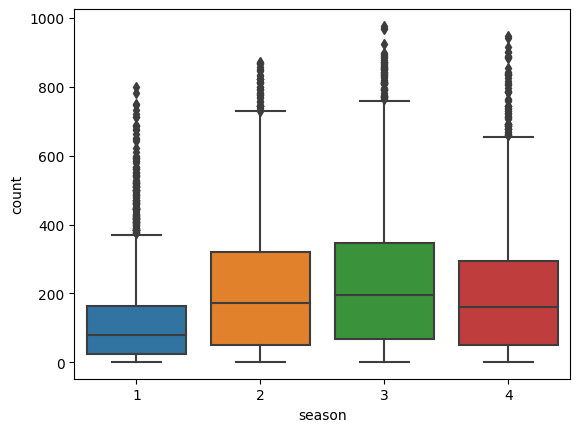

In [ ]:
sns.boxplot(x='season', y='count', data=df)
plt.show()

In [ ]:
df.groupby("weather")["count"].median()

weather
1    161.0
2    134.0
3     71.0
4    164.0
Name: count, dtype: float64

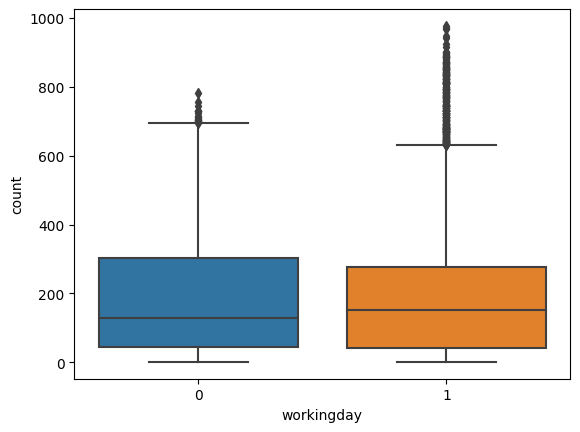

In [ ]:
sns.boxplot(x='workingday', y='count', data=df)
plt.show()

In [ ]:
weather_count_means = df.groupby("weather")["count"].mean()
weather_count_means

weather
1    205.236791
2    178.955540
3    118.846333
4    164.000000
Name: count, dtype: float64

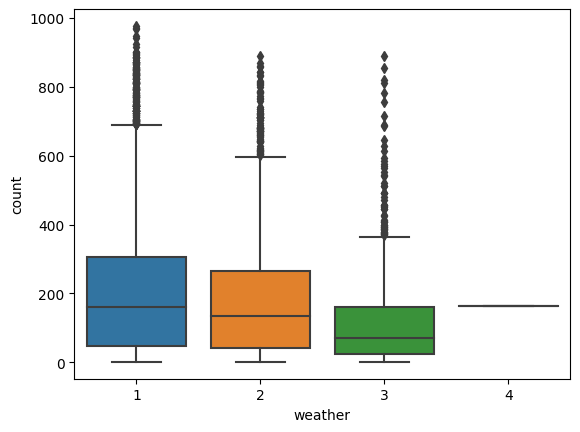

In [ ]:
sns.boxplot(x='weather', y='count', data=df)
plt.show()

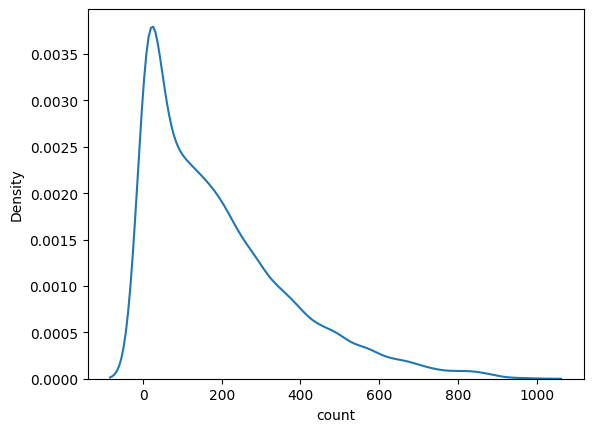

In [ ]:
sns.kdeplot(df['count'])
plt.show()

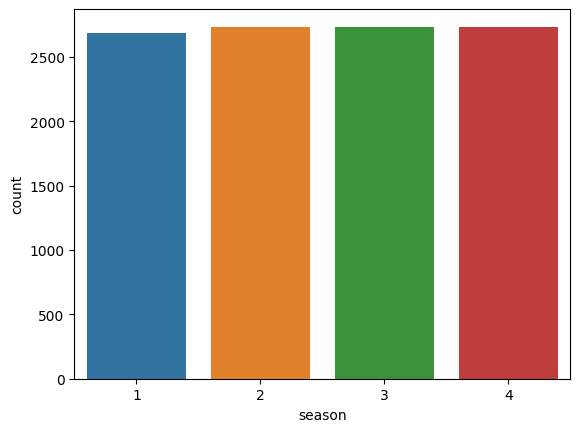

In [ ]:
sns.countplot(data=df, x="season")
plt.show()

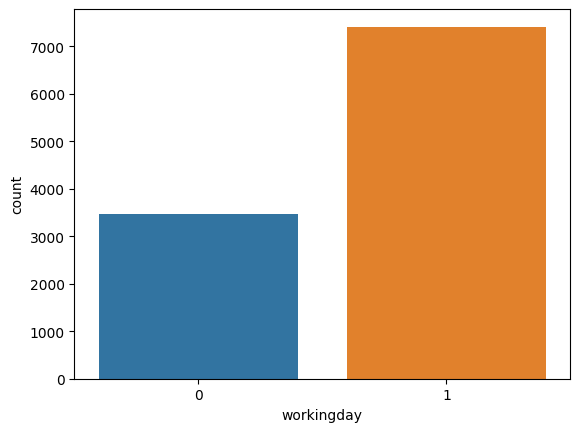

In [ ]:
sns.countplot(data=df, x="workingday")
plt.show()

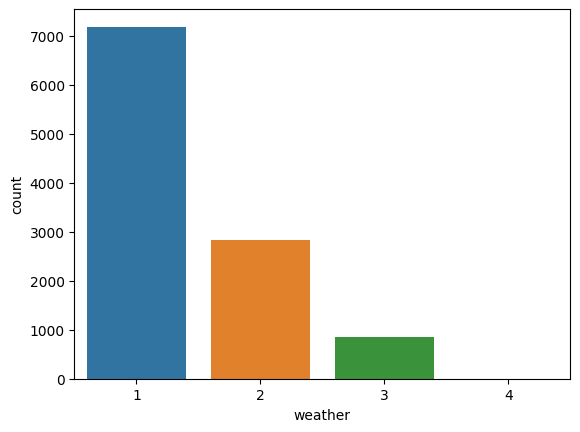

In [ ]:
sns.countplot(data=df, x="weather")
plt.show()

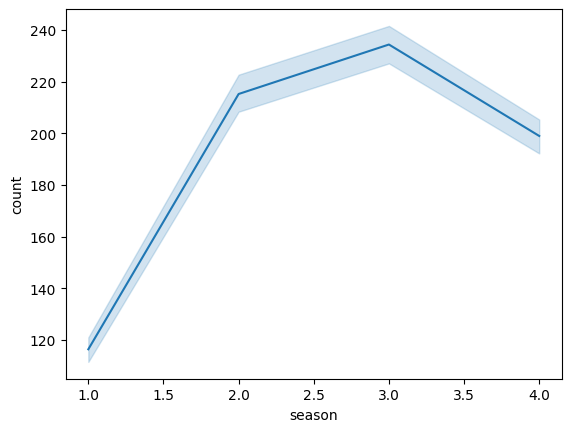

In [ ]:
sns.lineplot(data=df, x= "season", y="count")
plt.show()

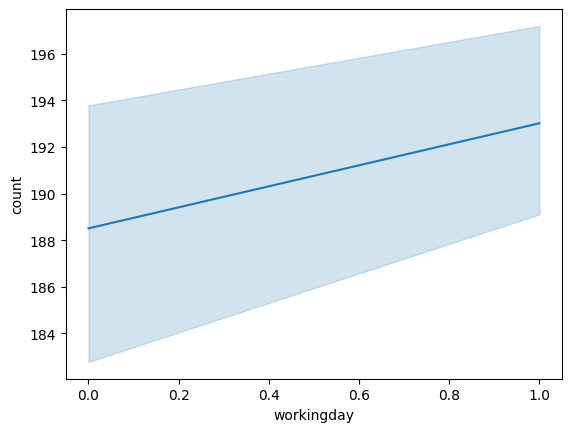

In [ ]:
sns.lineplot(data=df, x= "workingday", y="count")
plt.show()

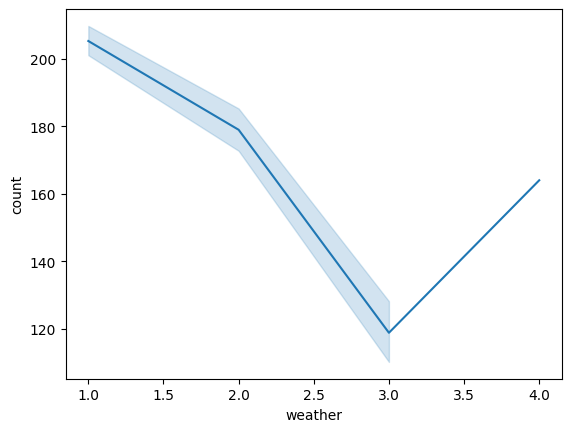

In [ ]:
sns.lineplot(data=df, x= "weather", y="count")
plt.show()

In [ ]:
# separating no. of cycles rented in different weathers
weather1= df[df["weather"]==1]["count"]
weather2= df[df["weather"]==2]["count"]
weather3= df[df["weather"]==3]["count"]
weather4= df[df["weather"]==4]["count"]

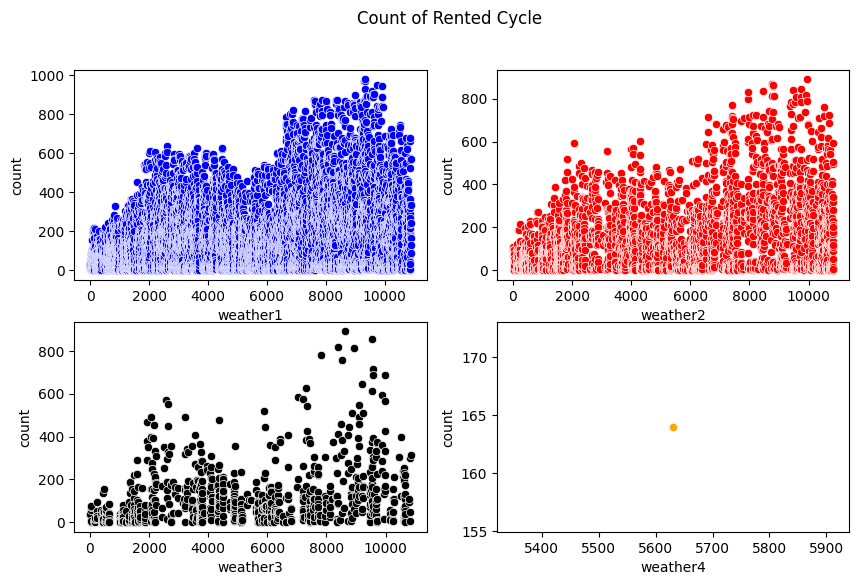

In [ ]:
# scatter plots of different weathers
fig = plt.figure(figsize=(10, 6)).suptitle("Count of Rented Cycle")

plt.subplot(2,2,1)
sns.scatterplot(weather1, color="b")
plt.xlabel("weather1")
plt.ylabel("count")

plt.subplot(2,2,2)
sns.scatterplot(weather2, color="r")
plt.xlabel("weather2")
plt.ylabel("count")

plt.subplot(2,2,3)
sns.scatterplot(weather3, color="black")
plt.xlabel("weather3")
plt.ylabel("count")

plt.subplot(2,2,4)
sns.scatterplot(weather4, color="orange")
plt.xlabel("weather4")
plt.ylabel("count")

plt.show()

In [ ]:
# separating no. of cycles rented in different weathers
season1= df[df["season"]==1]["count"]
season2= df[df["season"]==2]["count"]
season3= df[df["season"]==3]["count"]
season4= df[df["season"]==4]["count"]

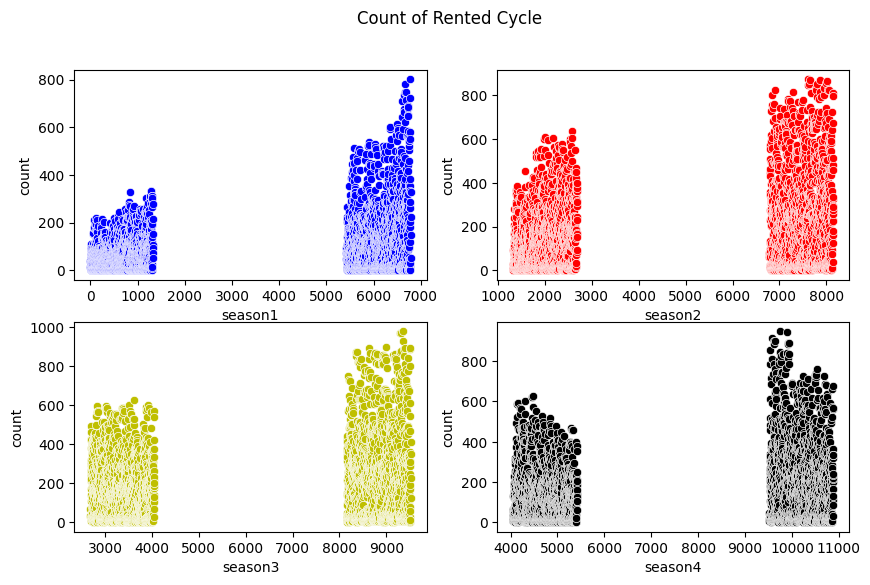

In [ ]:
# scatter plots of different weathers
fig = plt.figure(figsize=(10, 6)).suptitle("Count of Rented Cycle")

plt.subplot(2,2,1)
sns.scatterplot(season1, color="b")
plt.xlabel("season1")
plt.ylabel("count")

plt.subplot(2,2,2)
sns.scatterplot(season2, color="r")
plt.xlabel("season2")
plt.ylabel("count")

plt.subplot(2,2,3)
sns.scatterplot(season3, color="y")
plt.xlabel("season3")
plt.ylabel("count")

plt.subplot(2,2,4)
sns.scatterplot(season4, color="black")
plt.xlabel("season4")
plt.ylabel("count")

plt.show()

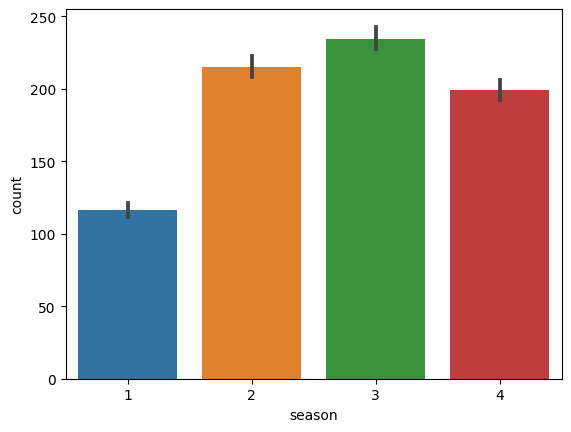

In [ ]:
sns.barplot(data=df, x="season", y="count", estimator=np.mean)
plt.show()

In [ ]:
workingday_yes= df[df["workingday"]==1]["count"]
workingday_yes

47         5
48         2
49         1
50         3
51        30
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 7412, dtype: int64

In [ ]:
workingday_no= df[df["workingday"]==0]["count"]
workingday_no

0         16
1         40
2         32
3         13
4          1
        ... 
10809    109
10810    122
10811    106
10812     89
10813     33
Name: count, Length: 3474, dtype: int64

In [ ]:
workingday_yes= np.mean(df[df["workingday"]==1]["count"])
workingday_yes

193.01187263896384

In [ ]:
workingday_no= np.mean(df[df["workingday"]==0]["count"])
workingday_no

188.50662061024755

In [ ]:
df_workingday_yes = df[df["workingday"]==1]
df_workingday_no = df[df["workingday"]==0]

# **Hypothesis Testing**
Whether workingday has effect on number of electric cycles rented or not

**Visual Analysis**

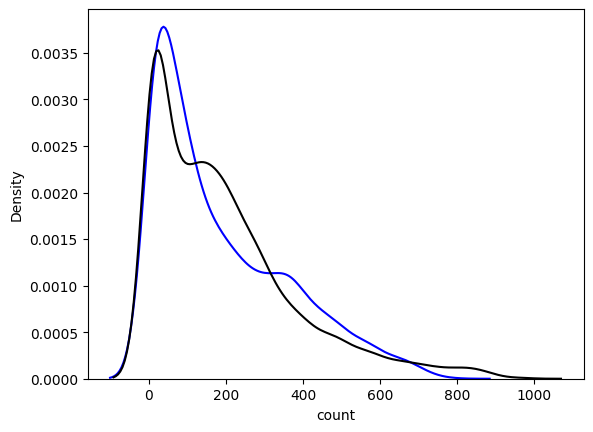

In [ ]:
sns.kdeplot(df_workingday_no["count"], color="blue")    # distribution of no of cycles rented on holiday
sns.kdeplot(df_workingday_yes["count"], color="black") # distribution of no of cycles rented on workingday
plt.show()

**Hypothesis formulation**

In [ ]:
# Hypothesis formulation
print("Ho: there is no effect of workingday on the number of electric cycles rented")
print("Ha: there is effect of workingday on the number of electric cycles rented")

Ho: there is no effect of workingday on the number of electric cycles rented
Ha: there is effect of workingday on the number of electric cycles rented


**selection of appropriate test**

In [ ]:
# selection of appropriate test
print("Since there are two groups, we will use T-test_ind (independant)")

Since there are two groups, we will use T-test_ind (independant)


**Checking for Normality & Equal variances**

In [ ]:
# the three assumptions are that the data follows normal distribution, the data is independant and there is equal variances among the diffrent groups.
# Test for checking normality
print("Ho: The data follow normal distribution.")
print("Ha: The data doesn't follow normal distribution.")
# The three tests to check whether the distribution is normal are QQPlot, kstest, shapiro test.

alpha =0.05

test_statistic, pvalue = kstest(df_workingday_no["count"], df_workingday_yes["count"], norm.cdf)
print("Test_statistic : ", test_statistic)
print("pvalue : ", pvalue)

if pvalue < alpha:
  print("Reject Ho, therefore the data doesn't follow normal distribution.")
else:
  print("Fail to Reject Ho, therefore the data follow normal distribution. \nConclusion: T-Test will give correct result.")

print("\n")
print("Ho: The variances among the distributions of cycles rented during workingdays and holidays is equal.")
print("Ha: The variances among the distributions of cycles rented during workingdays and holidays is not equal.")
# checking variances of cycles rented on holidays and workingdays
levene_statistic, levene_pvalue = levene(df_workingday_no["count"], df_workingday_yes["count"])
print("levene_statistic :", levene_statistic)
print("levene_pvalue :", levene_pvalue)

if pvalue < alpha:
  print("Reject Ho, therefore there are different variances among the distributions of cycles rented during workingdays and holidays.")
else:
  print("Fail to Reject Ho, therefore therefore there are equal variances among the distributions of cycles rented during workingdays and holidays.")

print("\nConclusion: T-Test will not give correct result, instead use Kruskal Test.")

Ho: The data follow normal distribution.
Ha: The data doesn't follow normal distribution.
Test_statistic :  0.05570196737090361
pvalue :  8.003959300341833e-07
Reject Ho, therefore the data doesn't follow normal distribution.


Ho: The variances among the distributions of cycles rented during workingdays and holidays is equal.
Ha: The variances among the distributions of cycles rented during workingdays and holidays is not equal.
levene_statistic : 0.004972848886504472
levene_pvalue : 0.9437823280916695
Reject Ho, therefore there are different variances among the distributions of cycles rented during workingdays and holidays.

Conclusion: T-Test will not give correct result, instead use Kruskal Test.


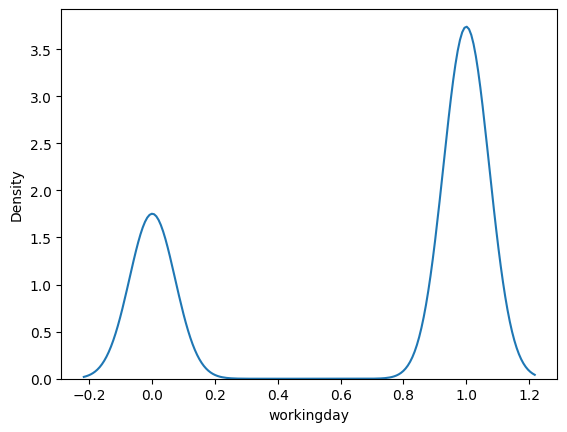

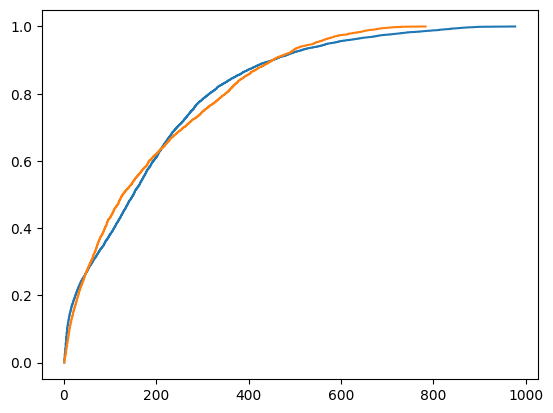

In [ ]:
# checking for these assumptions
sns.kdeplot(df["workingday"])
plt.show()

e1 = ECDF(df_workingday_yes["count"])
e2 = ECDF(df_workingday_no["count"])

plt.plot(e1.x, e1.y)
plt.plot(e2.x, e2.y)
plt.show()

# Kruskal Test

In [ ]:
alpha = 0.05
statistic, pvalue = kruskal(df_workingday_no["count"], df_workingday_yes["count"])
print("statistic : ", statistic)
print("pvalue : ", pvalue)

print("Conclusion : ")
if pvalue < alpha:
  print("Reject Ho, therefore there is significant effect of workingday on the number of electric cycles rented")
else:
  print("Fail to Reject Ho, therefore there is no significant effect of workingday on the number of electric cycles rented")

statistic :  0.0016182887191034687
pvalue :  0.9679113872727798
Conclusion : 
Fail to Reject Ho, therefore there is no significant effect of workingday on the number of electric cycles rented


# T-Test

In [ ]:
alpha = 0.05
T_statistic, t_pvalue = ttest_ind(df_workingday_no["count"], df_workingday_yes["count"])
print("T_statistic : ", statistic)
print("t_pvalue : ", pvalue)

print("Conclusion : ")
if pvalue < alpha:
  print("Reject Ho, therefore there is significant effect of workingday on the number of electric cycles rented")
else:
  print("Fail to Reject Ho, therefore there is no significant effect of workingday on the number of electric cycles rented")

T_statistic :  0.0016182887191034687
t_pvalue :  0.9679113872727798
Conclusion : 
Fail to Reject Ho, therefore there is no significant effect of workingday on the number of electric cycles rented


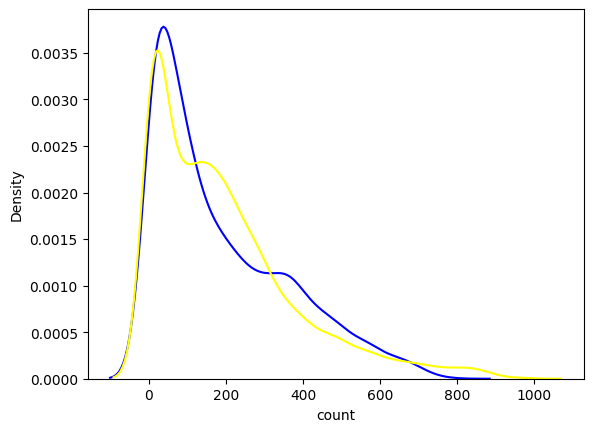

In [ ]:
sns.kdeplot(df_workingday_no["count"], color="blue")    # distribution of no of cycles rented on holiday
sns.kdeplot(df_workingday_yes["count"], color="yellow") # distribution of no of cycles rented on workingday
plt.show()

In [ ]:
# Hypothesis formulation
print("Ho: there is no effect of workingday on the number of electric cycles rented")
print("Ha: there is effect of workingday on the number of electric cycles rented")
# the three assumptions are that the data follows normal distribution, the data is independant and there is equal variances among the diffrent groups.

alpha = 0.05
statistic, pvalue = kstest(df_workingday_yes["count"], df_workingday_no["count"])
print("statistic : ", statistic)
print("pvalue : ", pvalue)

print("Conclusion : ")
if pvalue < alpha:
  print("Reject Ho, therefore there is significant effect of workingday on the number of electric cycles rented")
else:
  print("Fail to Reject Ho, therefore there is no significant effect of workingday on the number of electric cycles rented")

Ho: there is no effect of workingday on the number of electric cycles rented
Ha: there is effect of workingday on the number of electric cycles rented
statistic :  0.05570196737090361
pvalue :  8.003959300341833e-07
Conclusion : 
Reject Ho, therefore there is significant effect of workingday on the number of electric cycles rented


**No. of cycles rented is similar or different in different weathers**

In [ ]:
# separating no. of cycles rented in different weathers
weather1= df[df["weather"]==1]["count"]
weather2= df[df["weather"]==2]["count"]
weather3= df[df["weather"]==3]["count"]
weather4= df[df["weather"]==4]["count"]

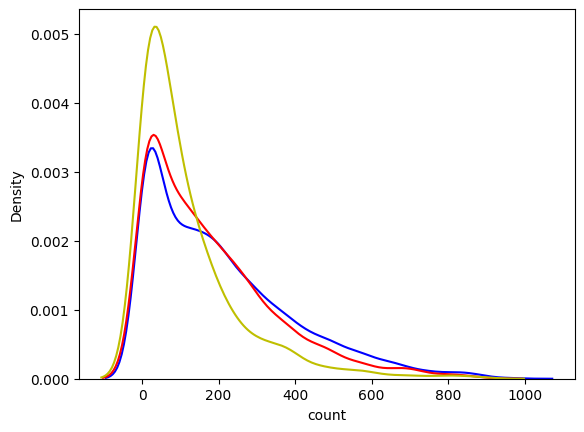

In [ ]:
# density plots of different weathers
sns.kdeplot(weather1, color="b")
sns.kdeplot(weather2, color="r")
sns.kdeplot(weather3, color="y")
sns.kdeplot(weather4, color="o", warn_singular=False)
plt.show()

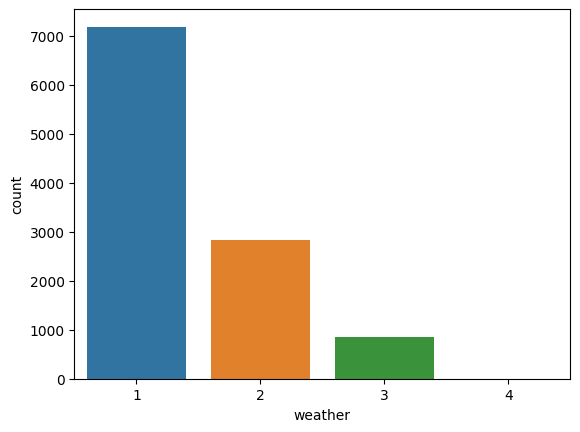

In [ ]:
sns.countplot(x="weather", data=df)
plt.show()

**Hypothesis Formulation**

In [ ]:
# Hypothesis formulation
print("Ho: mu1, mu2, mu3 and mu4 are equal or \nThe average number of electric cycles rented in different seasons are equal")
print("Ha: mu1, mu2, mu3, mu4 are not equal or \nAtleast one of the seasons average number of electric cycles rented differ from other three seasons")

Ho: mu1, mu2, mu3 and mu4 are equal or 
The average number of electric cycles rented in different seasons are equal
Ha: mu1, mu2, mu3, mu4 are not equal or 
Atleast one of the seasons average number of electric cycles rented differ from other three seasons


**Selection of appropriate test**

In [ ]:
# selection of appropriate test
print("Since there are more than two groups, we will use ANNOVA (F_test)")

Since there are more than two groups, we will use ANNOVA (F_test)


**Checking for Normality & equal variances**

In [ ]:
# the three assumptions are that the data follows normal distribution, the data is independant and there is equal variances among the diffrent groups.
# Test for checking normality
print("Ho: The data follow normal distribution.")
print("Ha: The data doesn't follow normal distribution.")
# The three tests to check whether the distribution is normal are QQPlot, kstest, shapiro test.

alpha =0.05

ks_statistic, ks_pvalue = kstest(weather1, weather2, weather3, weather4)
print("ks_statistic : ", test_statistic)
print("ks_pvalue : ", ks_pvalue)

if ks_pvalue < alpha:
  print("Reject Ho, therefore the data doesn't follow normal distribution.")
else:
  print("Fail to Reject Ho, therefore the data follow normal distribution. \nConclusion: F-Test will give correct result.")

print("\n")

print("Ho: The variances among the distributions of cycles rented in different weathers is equal.")
print("Ha: The variances among the distributions of cycles rented in different weathers is not equal.")
# checking variances of cycles rented on holidays and workingdays
levene_statistic, levene_pvalue = levene(weather1, weather2, weather3, weather4)
print("levene_statistic :", levene_statistic)
print("levene_pvalue :", levene_pvalue)

if levene_pvalue < alpha:
  print("Reject Ho, therefore there are different variances among the distributions of cycles rented in different weathers.")
else:
  print("Fail to Reject Ho, therefore therefore there are equal variances among the distributions of cycles rented in different weathers.")

print("\nConclusion: F test will not give correct result, instead use Kruskal Test.")

Ho: The data follow normal distribution.
Ha: The data doesn't follow normal distribution.
ks_statistic :  0.05570196737090361
ks_pvalue :  2.0232588507344455e-07
Reject Ho, therefore the data doesn't follow normal distribution.


Ho: The variances among the distributions of cycles rented in different weathers is equal.
Ha: The variances among the distributions of cycles rented in different weathers is not equal.
levene_statistic : 54.85106195954556
levene_pvalue : 3.504937946833238e-35
Reject Ho, therefore there are different variances among the distributions of cycles rented in different weathers.

Conclusion: F test will not give correct result, instead use Kruskal Test.


# **Kruskal Test**

In [ ]:
alpha = 0.05
Kruskal_statistic, Kruskal_pvalue = kruskal(weather1, weather2, weather3, weather4)
print("Kruskal_statistic : ", Kruskal_statistic)
print("Kruskal_pvalue : ", Kruskal_pvalue)

print("Conclusion : ")
if Kruskal_pvalue < alpha:
  print("Reject Ho, therefore mu1, mu2, mu3, mu4 are not equal or \nAtleast one of the seasons average number of electric cycles rented differ from other three weathers")
else:
  print("Fail to Reject Ho, therefore mu1, mu2, mu3 and mu4 are equal or \nThe average number of electric cycles rented in different weathers are equal")

Kruskal_statistic :  205.00216514479087
Kruskal_pvalue :  3.501611300708679e-44
Conclusion : 
Reject Ho, therefore mu1, mu2, mu3, mu4 are not equal or 
Atleast one of the seasons average number of electric cycles rented differ from other three weathers


# **F_Test/ANNOVA**

In [ ]:
alpha = 0.05
F_statistic, F_pvalue = f_oneway(weather1, weather2, weather3, weather4)
print("F_statistic : ", F_statistic)
print("F_pvalue : ", F_pvalue)

print("Conclusion : ")
if F_pvalue < alpha:
  print("Reject Ho, therefore mu1, mu2, mu3, mu4 are not equal or \nAtleast one of the seasons average number of electric cycles rented differ from other three seasons")
else:
  print("Fail to Reject Ho, therefore mu1, mu2, mu3 and mu4 are equal or \nThe average number of electric cycles rented in different seasons are equal")

F_statistic :  65.53024112793271
F_pvalue :  5.482069475935669e-42
Conclusion : 
Reject Ho, therefore mu1, mu2, mu3, mu4 are not equal or 
Atleast one of the seasons average number of electric cycles rented differ from other three seasons


**Check Whether No. of cycles rented is similar or different in different seasons**

In [ ]:
# separating no. of cycles rented in different seasons
season1= df[df["season"]==1]["count"]
season2= df[df["season"]==2]["count"]
season3= df[df["season"]==3]["count"]
season4= df[df["season"]==4]["count"]

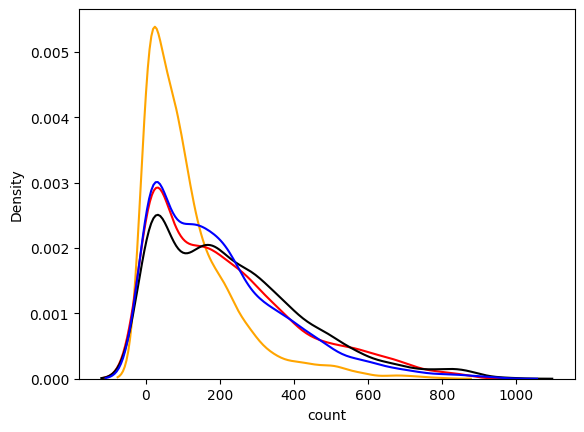

In [ ]:
# density plots of different seasons
sns.kdeplot(season1, color="orange")
sns.kdeplot(season2, color="r")
sns.kdeplot(season3, color="black")
sns.kdeplot(season4, color="b")
plt.show()

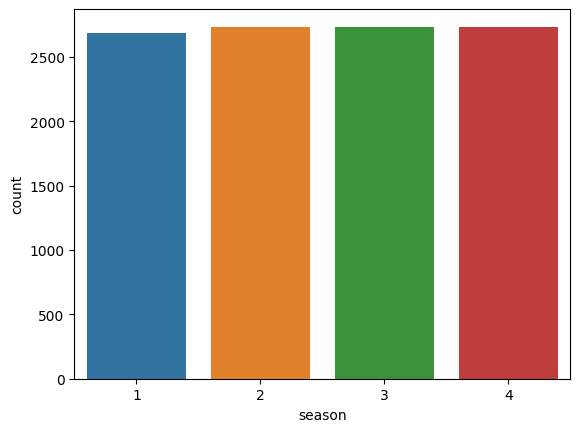

In [ ]:
sns.countplot(x="season", data=df)
plt.show()

**Hypothesis formulation**

In [ ]:
# Hypothesis formulation
print("Ho: mu1, mu2, mu3 and mu4 are equal or \nThe average number of electric cycles rented in different seasons are equal")
print("Ha: mu1, mu2, mu3, mu4 are not equal or \nAtleast one of the seasons average number of electric cycles rented differ from other three seasons")

Ho: mu1, mu2, mu3 and mu4 are equal or 
The average number of electric cycles rented in different seasons are equal
Ha: mu1, mu2, mu3, mu4 are not equal or 
Atleast one of the seasons average number of electric cycles rented differ from other three seasons


**Selection of appropriate test**

In [ ]:
# selection of appropriate test
print("Since there are more than two groups, we will use ANNOVA (F_test)")

Since there are more than two groups, we will use ANNOVA (F_test)


**Checking for Normality & equal variances**

In [ ]:
# the three assumptions are that the data follows normal distribution, the data is independant and there is equal variance among the diffrent groups.
# Test for checking normality
print("Ho: The data follow normal distribution.")
print("Ha: The data doesn't follow normal distribution.")
# The three tests to check whether the distribution is normal are QQPlot, kstest, shapiro test.

alpha =0.05

ks_statistic, ks_pvalue = kstest(season1, season2, season3, season4)
print("ks_statistic : ", test_statistic)
print("ks_pvalue : ", ks_pvalue)

if ks_pvalue < alpha:
  print("Reject Ho, therefore the data doesn't follow normal distribution.")
else:
  print("Fail to Reject Ho, therefore the data follow normal distribution. \nConclusion: F-Test will give correct result.")

print("\n")

print("Ho: The variances among the distributions of cycles rented in different seasons is equal.")
print("Ha: The variances among the distributions of cycles rented in different seasons is not equal.")
# checking variances of cycles rented on holidays and workingdays
levene_statistic, levene_pvalue = levene(season1, season2, season3, season4)
print("levene_statistic :", levene_statistic)
print("levene_pvalue :", levene_pvalue)

if levene_pvalue < alpha:
  print("Reject Ho, therefore there are different variance among the distributions of cycles rented in different seasons.")
else:
  print("Fail to Reject Ho, therefore therefore there are equal variance among the distributions of cycles rented in different seasons.")

print("\nConclusion: F test will not give correct result, instead use Kruskal Test.")

Ho: The data follow normal distribution.
Ha: The data doesn't follow normal distribution.
ks_statistic :  0.05570196737090361
ks_pvalue :  5.229818428809134e-90
Reject Ho, therefore the data doesn't follow normal distribution.


Ho: The variances among the distributions of cycles rented in different seasons is equal.
Ha: The variances among the distributions of cycles rented in different seasons is not equal.
levene_statistic : 187.7706624026276
levene_pvalue : 1.0147116860043298e-118
Reject Ho, therefore there are different variance among the distributions of cycles rented in different seasons.

Conclusion: F test will not give correct result, instead use Kruskal Test.


**Kruskal Test**

In [ ]:
alpha = 0.05
Kruskal_statistic, Kruskal_pvalue = kruskal(season1, season2, season3, season4)
print("Kruskal_statistic : ", Kruskal_statistic)
print("Kruskal_pvalue : ", Kruskal_pvalue)

print("Conclusion : ")
if Kruskal_pvalue < alpha:
  print("Reject Ho, therefore mu1, mu2, mu3, mu4 are not equal or \nAtleast one of the seasons average number of electric cycles rented differ from other three seasons")
else:
  print("Fail to Reject Ho, therefore mu1, mu2, mu3 and mu4 are equal or \nThe average number of electric cycles rented in different seasons are equal")

Kruskal_statistic :  699.6668548181988
Kruskal_pvalue :  2.479008372608633e-151
Conclusion : 
Reject Ho, therefore mu1, mu2, mu3, mu4 are not equal or 
Atleast one of the seasons average number of electric cycles rented differ from other three seasons


**F-Test/ANNOVA**

In [ ]:
# Hypothesis formulation
print("Ho: mu1, mu2, mu3 and mu4 are equal or \nThe average number of electric cycles rented in different seasons are equal")
print("Ha: mu1, mu2, mu3, mu4 are not equal or\nAtleast one of the seasons average number of electric cycles rented differ from other three seasons")

alpha = 0.05
f_statistic, f_pvalue = f_oneway(season1, season2, season3, season4)
print("f_statistic : ", f_statistic)
print("f_pvalue : ", f_pvalue)

print("\n")
print("Conclusion: ")
if f_pvalue < alpha:
  print("Reject Ho, therefore mu1, mu2, mu3, mu4 are not equal or \nAtleast one of the seasons average number of electric cycles rented differ from other three seasons")
else:
  print("Fail to Reject Ho, therefore mu1, mu2, mu3 and mu4 are equal or \nThe average number of electric cycles rented in different seasons are equal")

Ho: mu1, mu2, mu3 and mu4 are equal or 
The average number of electric cycles rented in different seasons are equal
Ha: mu1, mu2, mu3, mu4 are not equal or
Atleast one of the seasons average number of electric cycles rented differ from other three seasons
f_statistic :  236.94671081032106
f_pvalue :  6.164843386499654e-149


Conclusion: 
Reject Ho, therefore mu1, mu2, mu3, mu4 are not equal or 
Atleast one of the seasons average number of electric cycles rented differ from other three seasons


# **Check if weather is dependent on season**

In [ ]:
# Frequency table of different weathers & seasons
contingency_table = pd.crosstab(df["weather"], df["season"])
contingency_table

season,1,2,3,4
weather,,,,
1,1759,1801,1930,1702
2,715,708,604,807
3,211,224,199,225
4,1,0,0,0


In [ ]:
correlation_coeff = contingency_table.corr()
correlation_coeff

season,1,2,3,4
season,,,,
1,1.000000,0.999854,0.995093,0.997357
2,0.999854,1.000000,0.996474,0.996097
3,0.995093,0.996474,1.000000,0.985274
4,0.997357,0.996097,0.985274,1.000000


**Visual Analysis**

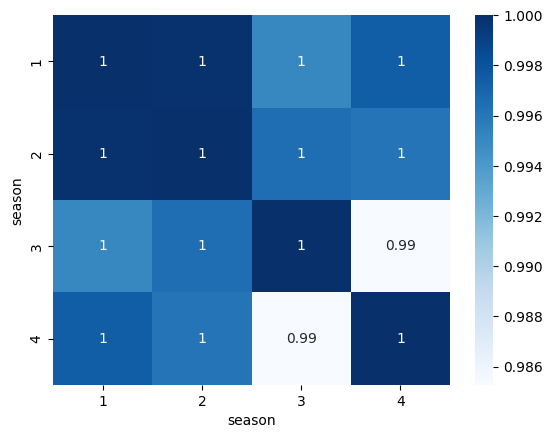

In [ ]:
sns.heatmap(correlation_coeff, cmap="Blues", annot=True)
plt.show()

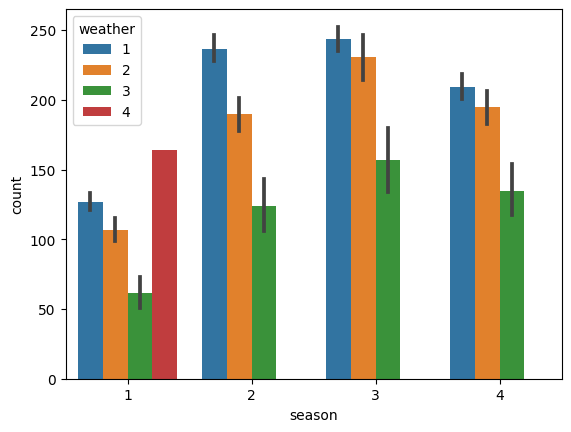

In [ ]:
sns.barplot(x="season", y="count", hue="weather", data=df)
plt.show()

**Hypothesis Formulation**

In [ ]:
# Hypothesis formulation
print("Ho: weather is dependent on the season")
print("Ha: weather is not dependent on the season")

Ho: weather is dependent on the season
Ha: weather is not dependent on the season


**Selection of appropriate test**

In [ ]:
# selection of appropriate test
print("Since there are categorical variables, hence we will use Chi_Square Test, test for independence")

Since there are categorical variables, hence we will use Chi_Square Test, test for independence


**Chi_Square Test**

In [ ]:
#setting Significance level
alpha = 0.05

# Perform the Chi-Square test for independence
chi2_statistic, chi2_pvalue, dof, expected = chi2_contingency(contingency_table)
chi2_statistic, chi2_pvalue

print("Chi-Square Statistic :", chi2_statistic)
print("P-Value: ", chi2_pvalue)

if chi2_pvalue < alpha:
    print("Reject the null hypothesis: Therefore the Weather and season are independent to each other.")
else:
    print("Fail to reject the null hypothesis: therefore the Weather and season are dependent on each other.")


Chi-Square Statistic : 49.15865559689363
P-Value:  1.5499250736864862e-07
Reject the null hypothesis: Therefore the Weather and season are independent to each other.


In [ ]:
print("Project Yulu: Hypothesis Testing\nPrepared by: Dr. Shabir Ahmad \nScaler Batch: Nov 2022\n")

Project Yulu: Hypothesis Testing
Prepared by: Dr. Shabir Ahmad 
Scaler Batch: Nov 2022
